<a href="https://colab.research.google.com/github/JadenD5321/Summer-2022-Microcredential-/blob/main/Decision_Trees_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: identify the problem 

In [ ]:
# !pip install pydot
# !pip install pydot-ng
# !pip install graphviz
# !pip install --upgrade scikit-learn==0.20.3



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sefat22/Micro-Credential-22/main/kyphosis.csv")

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


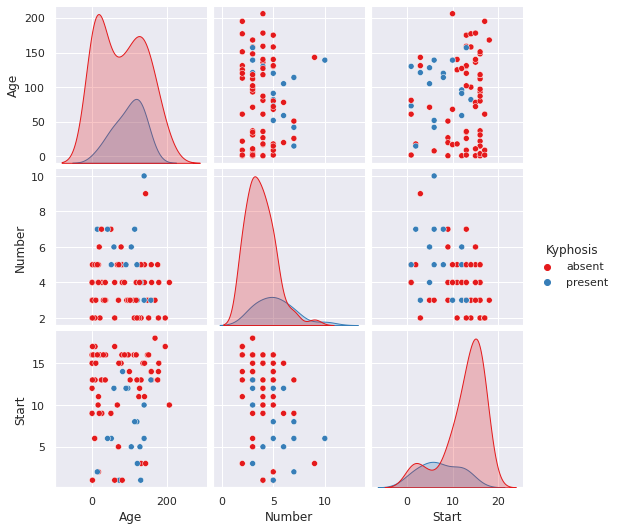

In [ ]:
sns.pairplot(df,hue ='Kyphosis',palette='Set1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
df.isnull()

,Kyphosis,Age,Number,Start
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76,False,False,False,False
77,False,False,False,False
78,False,False,False,False
79,False,False,False,False


In [ ]:
df.isnull().value_counts()

Kyphosis  Age    Number  Start
False     False  False   False    81
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier ()
dtree.fit(X_train, y_train) #A lot study to manipulate

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.94      0.76      0.84        21
     present       0.38      0.75      0.50         4

   micro avg       0.76      0.76      0.76        25
   macro avg       0.66      0.76      0.67        25
weighted avg       0.85      0.76      0.79        25



In [ ]:
print(confusion_matrix(y_test, predictions))

[[16  5]
 [ 1  3]]


In [ ]:
from IPython.display import Image 
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz 
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

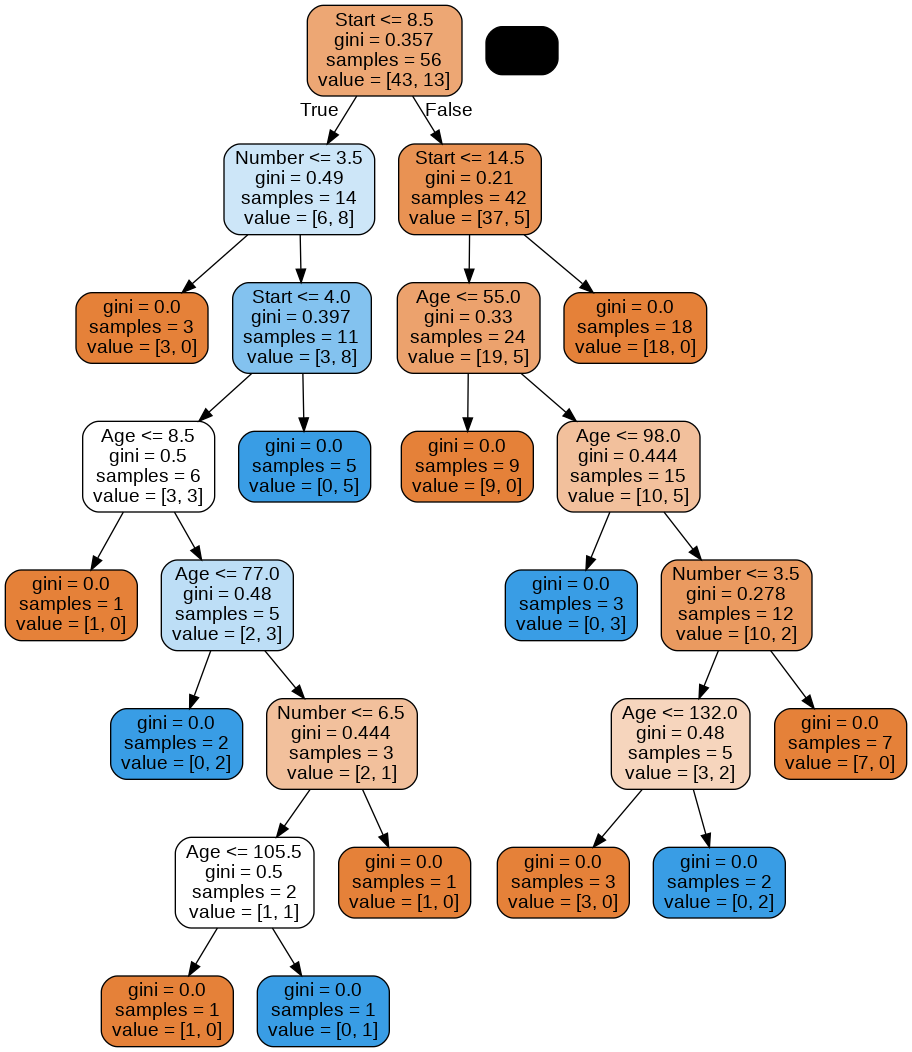

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
# RANDOM FORST, ASSEMBLING MANY MANY THINGS 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier (n_estimators=100)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use,

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))

[[21  0]
 [ 1  3]]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.95      1.00      0.98        21
     present       1.00      0.75      0.86         4

   micro avg       0.96      0.96      0.96        25
   macro avg       0.98      0.88      0.92        25
weighted avg       0.96      0.96      0.96        25

